# Classifying Positive and Negative Tweets

Rachael Bryant

Flatiron Phase 4 Project

Presented on February 13th at 10:00am

### Summary

Classifying tweets as positive or negative according to their context in order to improve Twitter's marketing is the business problem addressed in this project. The data chosen is from CrowdFlower via data.world and contains written tweets, the device to which these tweets were written about, and the emotion attributed to that tweet. There were not enough tweets classified as 'I can't tell' or 'No emotion toward brand or product' so that data was discarded, as well as the information regarding the device the emotion was directed towards. Due to the class imbalance found between the number of positive and negative tweets (84% positive and 16% negative) SMOTE (Synthetic Minority Oversampling Technique) was utilized before modeling the data in order to overcome the problem of overfitting. While exploring the data, it was discovered that word count and review length were about the same for positive and negative tweets. While preparing the data for modeling, NLK (Natural Language Toolkit) was utilized in tokenizing, lemmatization, and navigating stop words in the text. After conducting a train-test split on the data in order to properly validate the models, the data was standardized using StandardScaler and then vectorized using CountVectorizer. FreqDist from the NLK package aided in displaying the most frequent words that appear throughout the tweets (sxsw, mention, ipad, link). Basic Logistic Regression, Support Vector Machines, Stochastic Gradient Descent, Random Forest, Naive Nayes, and K-nearest Neighbors models were tested first. Logistic Regression (.96 Recall), Stochastic Gradient Descent (.96 Recall) and Random Forest (.99 Recall) were chosen for hypertuning. Stochastic Gradient Descent in a GridsearchCV resulted in a best recall score of .97 recall and false negatives occuring at 2.5%. Logistic Regression utilized GridSearchCV of estimators totalling 4800 fits resulting in a nest recall score of .93 and false negatives occuring at 5.6%. The best performing model was the Random Forest model which utilized RandomizedSearchCV totalling in 300 fits resulting in a best recall score of .99 and false negatives occuring .78%. 

<img src="Images/twitter-new-edit-tweet-.jpg" width=400 height=200 />

## Overview 

This project analyses the text of tweets in order to understand whether people tweet more negative or positive information in order to further Twitter's marketing campaign towards the appropriate demographic. This project primarily uses NLTK and base python with models of the data. 

## Business Problem

<img src="Images/positiveneutralnegativepic.png" width=500 height=200 />

Twitter is inquiring whether the majority of their tweets are positive or negative and requires a method in which to keep up with the wade and rise of their popularity. With this information they will be able to divert their traffic to different marketing areas to improve their reputation if it's low. We will train the data with labeled positive and negative tweets in order to choose the best model to decipher positive and negative data. 

## Data Understanding

The tweet data is from CrowdFlower via data.world and consists of 9,000 documents including columns of emotion expressed in the tweet, the tweet itself and the device that the emotion is directed towards.

In [1]:
#import necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score,precision_score,f1_score,log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import warnings; warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from tabulate import tabulate
import dataframe_image as dfi
from pandas.plotting import table 
import imblearn
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import string 
from nltk.tokenize import RegexpTokenizer
from collections import defaultdict
from nltk.corpus import wordnet 
from matplotlib.ticker import MaxNLocator
from sklearn.pipeline import Pipeline
from collections import Counter
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn import *
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.calibration import CalibratedClassifierCV
import pandas as pd
import dataframe_image as dfi
from importlib.metadata import version
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
from sklearn.cluster import SpectralClustering
import plotly.offline as pyoff
import plotly.graph_objs as go


#to record how long this notebook takes to run
import time
a = time.time()



In [2]:
#load data from csv file
corpus = pd.read_csv('Data/tweet_product_company.csv', encoding= 'unicode_escape')
corpus.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


There are primarily 3 columns containing the tweet context, the emotion of the tweet (primarily positive or negative), and the device or product the emotion in the tweet is directed at.

In [3]:
#inspect data to understand what information for each tweet was collected
print(corpus.describe())

print(corpus.info())

                                               tweet_text  \
count                                                9092   
unique                                               9065   
top     RT @mention Marissa Mayer: Google Will Connect...   
freq                                                    5   

       emotion_in_tweet_is_directed_at  \
count                             3291   
unique                               9   
top                               iPad   
freq                               946   

       is_there_an_emotion_directed_at_a_brand_or_product  
count                                                9093  
unique                                                  4  
top                    No emotion toward brand or product  
freq                                                 5389  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtyp

The corpus consists of about 9000 document, 9065 are unique tweet texts, 9 unique product or device, and 4 unique emotions. 

In [4]:
#inspecting the last 5 documents in the corpus, noting the random non-letter items and NaNs listed
corpus.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


In [5]:
#inspecting a full sample of a tweet. Noting there are hashtags, @ symbols, and other attributes.
corpus.loc[10].tweet_text

'Excited to meet the @samsungmobileus at #sxsw so I can show them my Sprint Galaxy S still running Android 2.1.   #fail'

In the above sample tweet I notice the @, the hashtags, and other attributes that may appear throughout and I need to account for. 

In [6]:
#Comparing the tweet_text sample above to the emotion assigned to it. 
#The word 'excited' seems to be why it is labeled as 'Positive emotion'
corpus.loc[10].is_there_an_emotion_directed_at_a_brand_or_product

'Positive emotion'

In [7]:
#Breaking down the 'is_there_an_emotion_directed_at_a_brand_or_product' column. 
#'No emotion' has the most data
corpus.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [8]:
#checking for any NA values, most are in column of 'where the emotion is directed at'
#- many people didn't have a specific item they were positive or negative about
corpus.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

Most of the 'NA' values were contained in the column of 'where the emotion is directed at' which may mean that many people didn't have a specific item they were positive or negative about. That column is dropped due the amount of 'NA's below. 

In [9]:
#The 'tweet_text and 'is_there_an_emotion_directed_at_a_brand_or_product' are the columns mostly concerned for this classification so the Nas are dropped
corpus.dropna(inplace=True)

In [10]:
#checking to make sure there the Nas are dropped from the columns
corpus.isna().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [11]:
#checking the shape. 3 columns with 3000 documents in the corpus
corpus.shape

(3291, 3)

In [12]:
#renaming columns to be shorter and better for clarity
corpus.columns = (['tt', 'device', 'emotion'])

In [13]:
#inspecting value counts in the corpus
corpus.value_counts()

tt                                                                                                                                                device                           emotion                           
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw                                    Google                           Positive emotion                      3
Really enjoying the changes in Gowalla 3.0 for Android! Looking forward to seeing what else they &amp; Foursquare have up their sleeves at #SXSW  Android App                      Positive emotion                      2
Before It Even Begins, Apple Wins #SXSW {link}                                                                                                    Apple                            Positive emotion                      2
Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesome. It's easier to browse events on iPad than on the website!!!  

In [14]:
#adding columns of review length and word count for descriptive comparison
corpus['review_len'] = corpus['tt'].astype(str).apply(len)
corpus['word_count'] = corpus['tt'].apply(lambda x: len(str(x).split()))

In order to look at any other predictive data, the word count and review length are added as columns in case the length of the tweet is an indicator of positive or negative emotion.

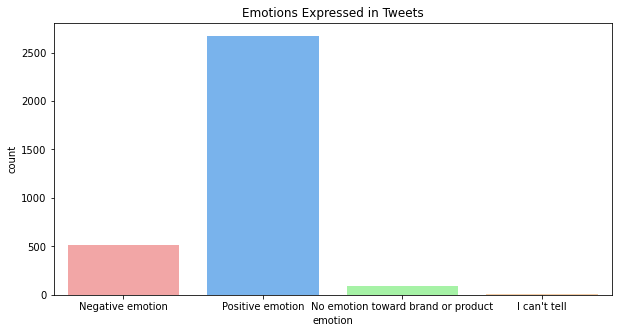

In [15]:
fig , ax = plt.subplots(figsize=(10,5))
palette= ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.countplot(x='emotion', data=corpus, palette = palette)
plt.title("Emotions Expressed in Tweets")
plt.show()

In [16]:
#There is a class imbalance between positive and negative emotions
n=len(corpus)
surv_0=len(corpus[corpus['emotion']== 'Negative emotion'])
surv_1=len(corpus[corpus['emotion']=='Positive emotion'])

print("% of people who expressed a positive emotion: ",surv_1*100/n)
print("% of people who expressed a negative emotion: ",surv_0*100/n)

% of people who expressed a positive emotion:  81.19112731692495
% of people who expressed a negative emotion:  15.77028258887876


In [17]:
#noting the low value counts in 'No emotion towards a brand or product' and 'I can't tell
corpus['emotion'].value_counts()

Positive emotion                      2672
Negative emotion                       519
No emotion toward brand or product      91
I can't tell                             9
Name: emotion, dtype: int64

There isn't enough data for 'No emotion toward brand or product' and 'I can't tell', therefore those items were dropped in order to focus on positive and negative data.

In [18]:
#dropping the two low value counts in the emotion column to focus on positive and negative
corpus_new = corpus[corpus['emotion'].str.contains("No emotion toward brand or product")==False]
corpus_new = corpus[corpus['emotion'].str.contains("I can't tell")==False]

In [19]:
#dropping the two low value counts in the emotion column to focus on positive and negative
corpus = corpus[corpus["emotion"].str.contains("No emotion toward brand or product|I can't tell") == False]

In [20]:
#checking to make sure there is only positive and negative emotion
corpus['emotion'].value_counts()

Positive emotion    2672
Negative emotion     519
Name: emotion, dtype: int64

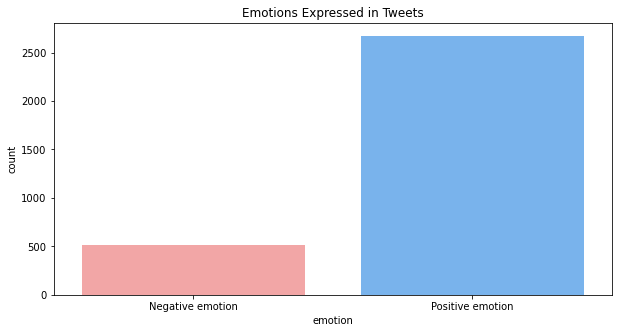

In [21]:
#Creating a plot to display how many tweets display positive or negative emotions
fig , ax = plt.subplots(figsize=(10,5))
palette= ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.countplot(x='emotion', data= corpus, palette = palette)
plt.title("Emotions Expressed in Tweets")
plt.show()

In [22]:
#There is a class imbalance between positive and negative emotions
n=len(corpus)
surv_0=len(corpus[corpus['emotion']== 'Negative emotion'])
surv_1=len(corpus[corpus['emotion']=='Positive emotion'])

print("% of people who expressed a positive emotion: ",surv_1*100/n)
print("% of people who expressed a negative emotion: ",surv_0*100/n)

% of people who expressed a positive emotion:  83.73550611093701
% of people who expressed a negative emotion:  16.26449388906299


There is an imbalance noticed in the emotion variable, in which there are so many more positive emotion than negative emotion. This could cause model evaluations to reflect this imbalance, so to counteract it synthetic Minority Oversampling Technique, or SMOTE is utilized before modeling and after the data is split into train and test groups in feature engineering.

In [23]:
# WORD-COUNT between the positive and negative tweets - no significant difference
print(corpus[corpus['emotion']=="Negative emotion"]['word_count'].mean()) 
print(corpus[corpus['emotion']=="Positive emotion"]['word_count'].mean()) 

18.72447013487476
18.199101796407184


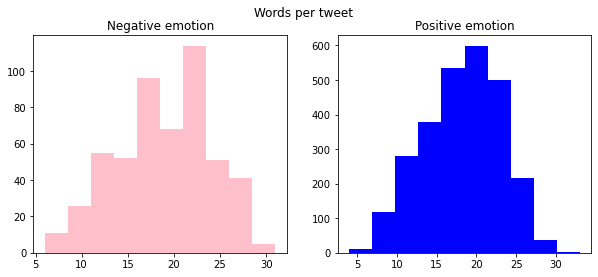

In [24]:
# PLOTTING WORD-COUNT, even though they have the same word count, distribution differs
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=corpus[corpus['emotion']=="Negative emotion"]['word_count']
ax1.hist(train_words,color='pink')
ax1.set_title('Negative emotion')
train_words=corpus[corpus['emotion']=="Positive emotion"]['word_count']
ax2.hist(train_words,color='blue')
ax2.set_title('Positive emotion')
fig.suptitle('Words per tweet')
plt.show()

The word count for positive and negative tweets are the same, so there is no indication that the length of the tweet is predictive for the emotion expressed throughout the tweet.

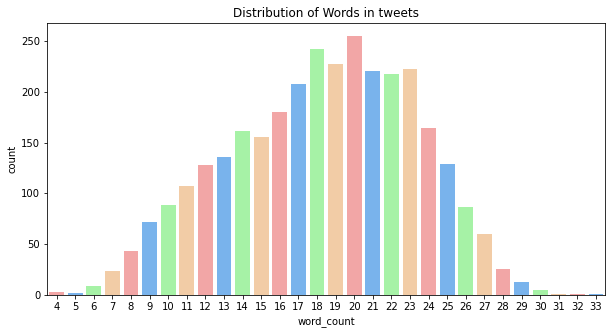

In [25]:
#Visualization of Word count throughout tweets
fig , ax = plt.subplots(figsize=(10,5))
palette= ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.countplot(x='word_count', data=corpus, palette = palette)
plt.title("Distribution of Words in tweets")
plt.show()

In [26]:
# Review length between the positive and negative tweets
print(corpus[corpus['emotion']=="Negative emotion"]['review_len'].mean()) 
print(corpus[corpus['emotion']=="Positive emotion"]['review_len'].mean()) 

108.9325626204239
105.4872754491018


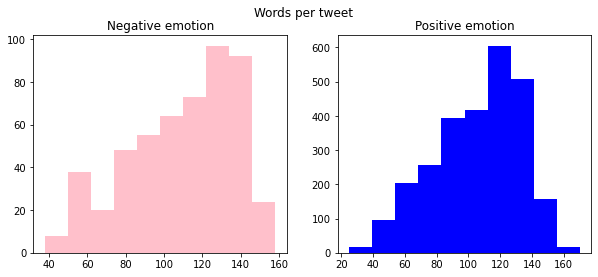

In [27]:
# PLOTTING Review Length between the positive and negative tweets
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=corpus[corpus['emotion']=="Negative emotion"]['review_len']
ax1.hist(train_words,color='pink')
ax1.set_title('Negative emotion')
train_words=corpus[corpus['emotion']=="Positive emotion"]['review_len']
ax2.hist(train_words,color='blue')
ax2.set_title('Positive emotion')
fig.suptitle('Words per tweet')
plt.show()


The review length is similar to word count however it counts all characters, such as hashtags, symbols, and other attributes. Negative and Positive didn't have a strong difference in review length with N=108 and P=105

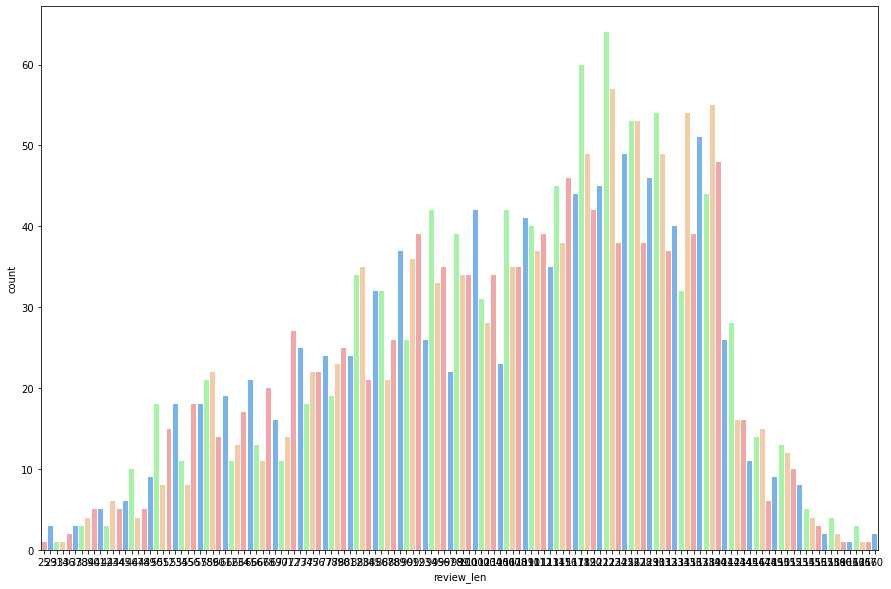

In [28]:
#Visualization of Reviw Length throughout tweets
fig , ax = plt.subplots(figsize=(15,10))
palette= ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.countplot(x='review_len', data=corpus, palette = palette)
plt.show()

## Text Preprocessing: Tokenizing

Tokenizing is an important aspect of text classification because it will allow the program to understand the text better before modeling. Semantic understanding is more difficult than numbers for computer programs to analyze, so these steps aid to make the process smoother. The cell below takes a sample document through the preprocessing steps to pratice and also understand how the steps perform on the data before applying it to the full data.

In [29]:
#taking one sample to demonstrate the difference between a raw, split by word, and nltk tokenized
sample_document = corpus.iloc[1].tt
print(sample_document)
print("\n")
print(sample_document.split())
print("\n")

#See an example of tokenizing 
print(word_tokenize(corpus['tt'].iloc[1]))
print("\n")

#changing to all lower cased letters
manual_cleanup = [word.lower() for word in sample_document.split()]
print(manual_cleanup)
print("\n")

#changing to remove punctuation
manual_cleanup = [s.translate(str.maketrans('','', string.punctuation))\
                  for s in manual_cleanup]
print(manual_cleanup)
print("\n")

#Making notice of the stop words
stops = [token for token in manual_cleanup if token in stopwords.words('english')]
print(f'There are {len(stops)} instances of {len(set(stops))} \
stopwords in the sample_document')

print("\n")
print(f'The {len(stops)} instances make up \
{len(stops) /len(manual_cleanup): 0.2%} of our text')

#removing the stop words (words that don't have contextual meanings)
print("\n")
sw = stopwords.words('english')
manual_cleanup = [token for token in manual_cleanup if token not in sw]
manual_cleanup_fin = [token for token in manual_cleanup if\
                 token not in sw]

print("\n")
print(f'After removing stopwords, there are {len(set(manual_cleanup_fin))} unqiue words left')

#Lemmatization- grouping together of the words with the same semantic meaning
lemmatizer = nltk.stem.WordNetLemmatizer()
sample_doc_tagged = pos_tag(manual_cleanup_fin)
print(sample_doc_tagged)
print("\n")

@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW


['@jessedee', 'Know', 'about', '@fludapp', '?', 'Awesome', 'iPad/iPhone', 'app', 'that', "you'll", 'likely', 'appreciate', 'for', 'its', 'design.', 'Also,', "they're", 'giving', 'free', 'Ts', 'at', '#SXSW']


['@', 'jessedee', 'Know', 'about', '@', 'fludapp', '?', 'Awesome', 'iPad/iPhone', 'app', 'that', 'you', "'ll", 'likely', 'appreciate', 'for', 'its', 'design', '.', 'Also', ',', 'they', "'re", 'giving', 'free', 'Ts', 'at', '#', 'SXSW']


['@jessedee', 'know', 'about', '@fludapp', '?', 'awesome', 'ipad/iphone', 'app', 'that', "you'll", 'likely', 'appreciate', 'for', 'its', 'design.', 'also,', "they're", 'giving', 'free', 'ts', 'at', '#sxsw']


['jessedee', 'know', 'about', 'fludapp', '', 'awesome', 'ipadiphone', 'app', 'that', 'youll', 'likely', 'appreciate', 'for', 'its', 'design', 'also', 'theyre', 'giving', 'free', 'ts', 'at', 'sxsw']


The

In the cell below we apply the preprocessing steps to the full data, which includes converting all the words to lowercase letters, stopword removal, lemmatization and tagging. 

In [30]:
#text pre-processing steps:

#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
# Tokenize the sentence with lemmatization
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)


In [31]:
#applying the final function of all the text pre-process onto the corpus, creating a new column
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
corpus['clean_text'] = corpus['tt'].apply(lambda x: finalpreprocess(x))
corpus.head()

,tt,device,emotion,review_len,word_count,clean_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,23,wesley g iphone hr tweet rise austin dead need...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,22,jessedee know fludapp awesome ipad iphone app ...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,15,swonderlin wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,15,sxsw hope year festival crashy year iphone app...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,17,sxtxstate great stuff fri sxsw marissa mayer g...


## Feature Engineering

Feature engineering aids in creating better models through manipulating, standardizing, extracting, and preparing the data. Below we perform a train test split in order to keep a percentage of data from manipulation for a good measure against the models. 

In [32]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(corpus["clean_text"],corpus["emotion"],test_size=0.2,shuffle=True)

Vectorizing the data is important for text classification models because it enables the computer to better understand the semantics of langugae that it otherwise couldn't make sense of. It is performed with CountVectorizer below. 

In [33]:
#vectorizing the data in order to properly analyze in modeling
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=sw,)
X = vec.fit_transform(corpus['clean_text'])
X_train_vec = vec.fit_transform(X_train) 
X_train_vec = pd.DataFrame.sparse.from_spmatrix(X_train_vec)

X_train_vec.columns = sorted(vec.vocabulary_)

X_train_vec.set_index(y_train.index, inplace = True) 

#Normalize the data with StandardScaler to prevent any data leakage
ss = StandardScaler(with_mean=False)
X_train_ss = ss.fit_transform(X_train_vec)
X_train_ss = X_train_ss.toarray()


In [34]:
#vectorizing and normalizing the data with StandardScaler for the X_test data for modeling
X_test_vec = vec.transform(X_test)
X_test_vec =pd.DataFrame.sparse.from_spmatrix(X_test_vec)
X_test_vec.columns = sorted(vec.vocabulary_)
X_test_vec.set_index(y_test.index, inplace = True) 


X_test_ss = ss.fit_transform(X_test_vec)


SMOTE is utilized to address the class imbalance between positive and negative emotions in order to combat underfitting the models.

In [35]:
#SMOTE is utilized to address the class imbalance- train/test fitted to smote 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_ss, y_train)

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='emotion'>

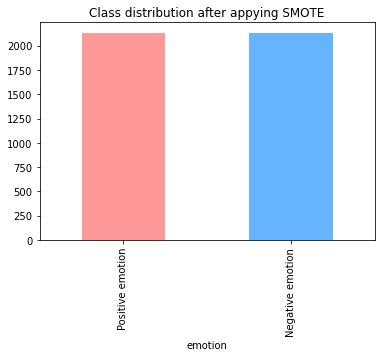

In [36]:
#SMOTE is utilized to address the class imbalance- resampling and plotting churn to ensure class imbalance has been fixed 
X_resampled, y_resampled = SMOTE().fit_resample(X_train_ss, y_train)


color= ['#ff9999','#66b3ff','#99ff99','#ffcc99']
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='emotion', color = color)




In [37]:
#checking the data to ensure properly vectorized
X_train_vec.set_index(y_train.index)

,aapl,abacus,abandon,aber,ability,able,abroad,absolute,absolutely,abt,...,zgd,zimride,zip,zite,zms,zombie,zomg,zone,zoom,zzzs
7411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


FreqDist from the NLK package is utilized below in order to understand the most common words throughout the tweets.

In [38]:
#Frequency Distribution to see what words were more commonly written throughout the tweets

freq_dist = FreqDist(X_test_vec)
print(freq_dist)
print("\n")

top_25 = X_train_vec.sum().sort_values(ascending=False)[:25].index
print(top_25)



<FreqDist with 4095 samples and 4095 outcomes>


Index(['sxsw', 'mention', 'ipad', 'link', 'apple', 'rt', 'google', 'iphone',
       'store', 'quot', 'app', 'new', 'get', 'austin', 'android', 'pop', 'go',
       'amp', 'launch', 'open', 'line', 'one', 'come', 'win', 'time'],
      dtype='object')


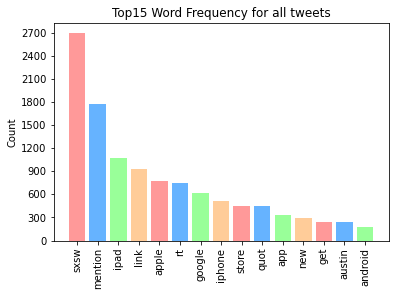

In [39]:
#Vizualize the Frequency Distribution created above in the plot below 

def visualize_top_25(freq_dist, title):

    # Extract data for plotting
    top_15 = list(zip(*freq_dist.most_common(15)))
    tokens = top_25[0]
    counts = top_25[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    color= ['#ff9999','#66b3ff','#99ff99','#ffcc99']
    ax.bar(X_train_vec.sum().sort_values(ascending=False)[:15].index, X_train_vec.sum().sort_values(ascending=False)[:15], color = color)

    # Customize plot appearance
    palette= ['#ff9999','#66b3ff','#99ff99','#ffcc99']
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    
visualize_top_25(freq_dist, "Top15 Word Frequency for all tweets")

SXSW, mention, ipad, and link were the top 5 words throughout these tweets. They tend to be marketing based in nature. 

## Modeling

In order to choose what models to hypertune, I placed baseline models inside of a dictionary and then created a dataframe of the accuracy, precision, and recall of the models for comparison. It is broken down into the steps below. 

In [40]:
#instantiating models within a dictionary in order to establish baseline models for comparisons
models = {}

# Logistic Regression

models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

# Stochastic Gradient Descent
models['Stochastic Gradient Descent'] = SGDClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [41]:
#looking for accuracy, precision and recall scores within the baseline models
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_res, y_res)
    
    # Make predictions
    predictions = models[key].predict(X_test_ss.toarray())
    

    accuracy[key] = accuracy_score(y_test, predictions)
    precision[key] = precision_score(y_test, predictions, average="binary", pos_label='Positive emotion')
    recall[key] = recall_score(y_test, predictions, average="binary", pos_label='Positive emotion')

In [42]:
#printing out accuracy, precision, and recall scores from each of those models to see which has the highest baseline with which to hypertune

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
columns=['Accuracy', 'Precision', 'Recall']


modeltable_basic1 = (tabulate(df_model, headers = columns, tablefmt="grid"))
print(modeltable_basic1)

# plt.savefig('modeltable_basic1.png')
# dfi.export(df_model,"modeltable_basic1.png")



+-----------------------------+------------+-------------+----------+
|                             |   Accuracy |   Precision |   Recall |
+=============================+============+=============+==========+
| Logistic Regression         |   0.885759 |    0.917563 | 0.949907 |
+-----------------------------+------------+-------------+----------+
| Support Vector Machines     |   0.852895 |    0.909761 | 0.916512 |
+-----------------------------+------------+-------------+----------+
| Stochastic Gradient Descent |   0.86385  |    0.899293 | 0.944341 |
+-----------------------------+------------+-------------+----------+
| Random Forest               |   0.823161 |    0.88587  | 0.907236 |
+-----------------------------+------------+-------------+----------+
| Naive Bayes                 |   0.730829 |    0.919908 | 0.745826 |
+-----------------------------+------------+-------------+----------+
| K-Nearest Neighbor          |   0.86072  |    0.910584 | 0.925788 |
+-------------------

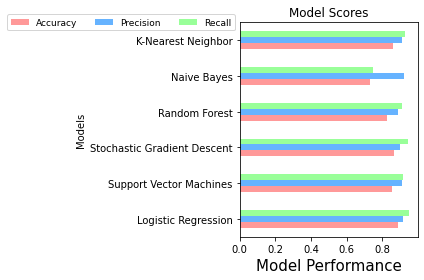

In [43]:
#Plotting the accuracy, precision and recall scores of the baseline models for visual comparison
color = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = df_model.plot.barh(title = 'Model Scores', color = color)

ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='right',
    prop={'size': 9},
    

    
)
ax.set_xlabel('Model Performance', fontsize=15)
ax.set_ylabel('Models', fontsize='medium')
plt.tight_layout()

## Hypertuning Models

Logistic Regression (.96 Recall), Stochastic Gradient Descent (.96 Recall) and Random Forest (.99 Recall) were chosen for hypertuning.

Stochastic Gradient Descent is a supervised machine learning algorithm algorithm often used to find the model parameters that correspond to the best fit between predicted and actual outputs.

In [44]:
#Stochastic Gradient Descent hypertuning model 

model_sgd = SGDClassifier(max_iter=500)
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}


clf = GridSearchCV(model_sgd, param_grid=params)



clf.fit(X_res, y_res)
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
clf_best = clf.best_params_
# clf_best.fit(X_res, y_res)  
# y_pred_clf = clf_best.predict(X_test_ss.toarray())
# y_pred_clf_train = clf_best.predict(X_res)

y_pred_clf = clf.predict(X_test_ss.toarray())
y_pred_clf_train = clf.predict(X_res)


print('recall %s' % recall_score(y_pred_clf, y_test, pos_label='Positive emotion'))
print(classification_report(y_test, y_pred_clf))
print('Training set recall: ', metrics.recall_score(y_res, y_pred_clf_train, pos_label='Positive emotion'))
print('Test set recall: ',metrics.recall_score(y_test, y_pred_clf, pos_label='Positive emotion'))
#classification report of the improved knn model
print(classification_report(y_test, y_pred_clf))
print(confusion_matrix(y_test, y_pred_clf))

print(np.mean(y_pred_clf == y_test))
print(np.mean(y_pred_clf != y_test))

#looking at the number of false positives in the data 
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_clf).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)




Best: 0.968826 using {'alpha': 0.1, 'loss': 'modified_huber', 'penalty': 'l2'}
recall 0.9079646017699115
                  precision    recall  f1-score   support

Negative emotion       0.65      0.48      0.55       100
Positive emotion       0.91      0.95      0.93       539

        accuracy                           0.88       639
       macro avg       0.78      0.72      0.74       639
    weighted avg       0.87      0.88      0.87       639

Training set recall:  0.9953117674636662
Test set recall:  0.9517625231910947
                  precision    recall  f1-score   support

Negative emotion       0.65      0.48      0.55       100
Positive emotion       0.91      0.95      0.93       539

        accuracy                           0.88       639
       macro avg       0.78      0.72      0.74       639
    weighted avg       0.87      0.88      0.87       639

[[ 48  52]
 [ 26 513]]
0.8779342723004695
0.12206572769953052
True negatives:  48 
False positives:  52 
False nega

False negatives are test results that incorrectly indicates that the condition being tested for is not present when, in fact, the condition is actually present. In this case positive emotion from tweets are indicated as not being present in the present when they actually are about 2.50% of the time.
This is an important metric because we want to make sure that we are classifying these positive emotions as positive as often as possible. In this matrix below, 2.50% of the time a positive emotion tweet is classified as a negative tweet, and we could be losing out on marketing opportunities due to even this small percentage of misclassifying. 

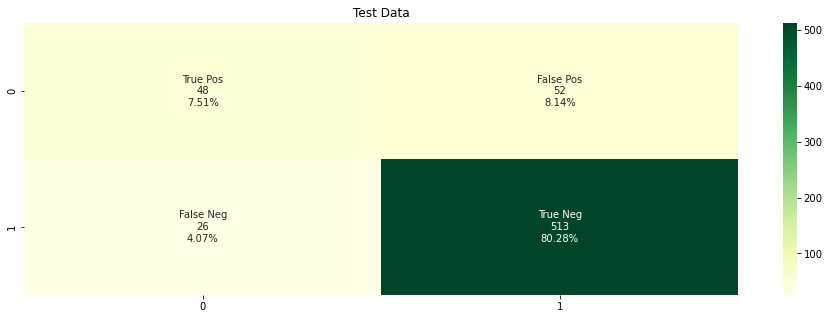

In [45]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,y_pred_clf)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap="YlGn").set_title('Test Data');

ROC is a coomon tool for binary classifiers to evaluate the performance of the classification model. The True Positive Rate (recall or sensitivity) and False Positive Rate (specificity) are shown at different classification thresholds in order to show predictive value of the model. The ROC below shows a curve above the No Skill line in indicating no predictive value and throughout is a good model for predicting this behavior. 

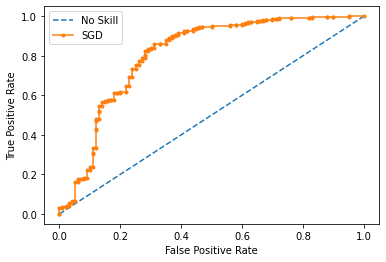

In [46]:
# predict probabilities on hypertuned Stochastic Gradient Descent model
calibrator = CalibratedClassifierCV(clf, cv='prefit')
model_sgd=calibrator.fit(X_res, y_res)
yhat = model_sgd.predict_proba(X_test_ss)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs, pos_label='Positive emotion')
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='SGD')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

0.8183116883116883 0.8073469387755102


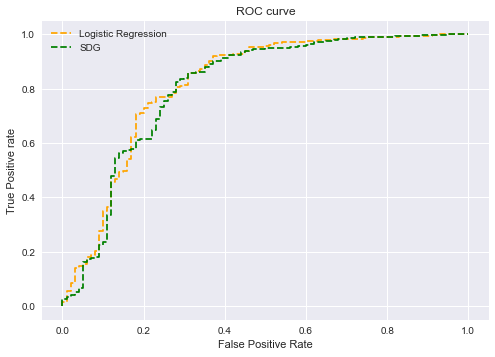

In [47]:
# Testing ROC on this hypertuned Stochastic Gradient Descent model in comparison to basic LR


clf_reg = LogisticRegression()
clf_reg.fit(X_res, y_res)
model_sgd=calibrator.fit(X_res, y_res)
yhat = model_sgd.predict_proba(X_test_ss)


# predict probabilities
pred_prob1 = clf_reg.predict_proba(X_test_ss.toarray())
pred_prob2 = model_sgd.predict_proba(X_test_ss.toarray())

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label='Positive emotion')
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label='Positive emotion')

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SDG')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


The model below is the Logistic Regression algorithm fitted to the data. The Logistic Regression algorithm is a supervised method used to predict a binary outcome based on prior observations of a data set.

In [48]:
#Hypertuning a Logistic Regression model
param_grid_lr = ({"max_iter": [20, 50, 100, 200, 500, 1000],
                  "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                  "class_weight": ["balanced"],
                  "penalty" : ['none', 'l1', 'l2', 'elasticnet'],
                  'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})


logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234),scoring ="recall", param_grid=param_grid_lr, verbose=1, cv=5, n_jobs=-1)

# print(logModel_grid.best_estimator_)
logModel_grid.fit(X_res, y_res)
print(logModel_grid.best_estimator_)
y_pred_lr = logModel_grid.predict(X_test_ss.toarray())
y_pred_lr_train = logModel_grid.predict(X_res)

      

print('recall %s' % recall_score(y_pred_lr, y_test, pos_label='Positive emotion'))
print(classification_report(y_test, y_pred_lr))
print('Training set recall: ', metrics.recall_score(y_res, y_pred_lr_train, pos_label='Positive emotion'))
print('Test set recall: ',metrics.recall_score(y_test, y_pred_lr, pos_label='Positive emotion'))
#classification report of the improved knn model
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

print(np.mean(y_pred_clf == y_test))
print(np.mean(y_pred_clf != y_test))

#looking at the number of false positives in the data 
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)



Fitting 5 folds for each of 960 candidates, totalling 4800 fits
LogisticRegression(C=0.0001, class_weight='balanced', max_iter=20,
                   penalty='none', random_state=1234, solver='newton-cg')
recall 0.9115523465703971
                  precision    recall  f1-score   support

Negative emotion       0.60      0.51      0.55       100
Positive emotion       0.91      0.94      0.92       539

        accuracy                           0.87       639
       macro avg       0.76      0.72      0.74       639
    weighted avg       0.86      0.87      0.87       639

Training set recall:  0.9985935302390999
Test set recall:  0.9369202226345084
                  precision    recall  f1-score   support

Negative emotion       0.60      0.51      0.55       100
Positive emotion       0.91      0.94      0.92       539

        accuracy                           0.87       639
       macro avg       0.76      0.72      0.74       639
    weighted avg       0.86      0.87      0.87 

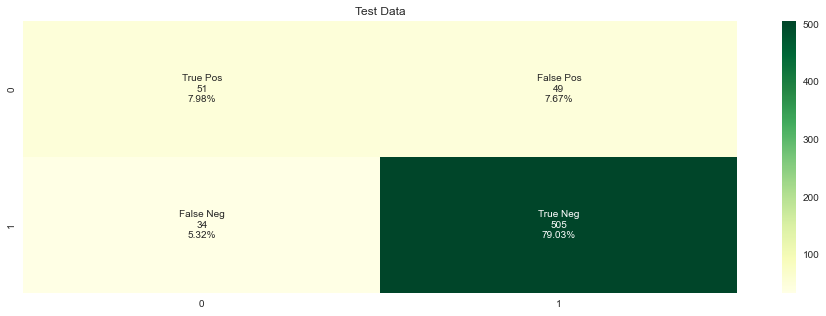

In [49]:
# confusion matrix heatmap for hypertuned Logistic Rregression model
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,y_pred_lr)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap="YlGn").set_title('Test Data');

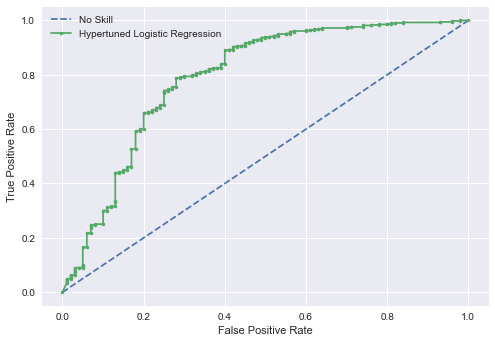

In [50]:
# predict probabilities ROC on hypertuned logistic Regression model
calibrator = CalibratedClassifierCV(logModel_grid, cv='prefit')
model_lr=calibrator.fit(X_res, y_res)
yhat_lr = logModel_grid.predict_proba(X_test_ss)
# retrieve just the probabilities for the positive class
pos_probs = yhat_lr[:, 1]  
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs, pos_label='Positive emotion')
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Hypertuned Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

0.8183116883116883 0.8073469387755102 0.7920593692022263


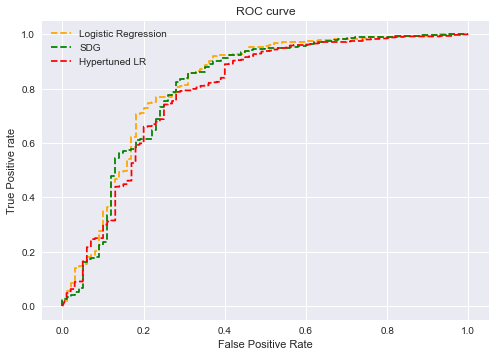

In [51]:
# Testing ROC on this hypertuned logistic Regression model in comparison to basic LR and hypertuned SGD model

clf_reg = LogisticRegression()
clf_reg.fit(X_res, y_res)


# predict probabilities
pred_prob1 = clf_reg.predict_proba(X_test_ss.toarray())
pred_prob2 = model_sgd.predict_proba(X_test_ss.toarray())
pred_prob3 = logModel_grid.predict_proba(X_test_ss.toarray())


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label='Positive emotion')
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label='Positive emotion')
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label='Positive emotion')

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2, auc_score3)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SDG')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Hypertuned LR')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


In the cell below we will fit the Random Forest Classifier to the data. This algorithm grows multiple decision trees which are merged together for a more accurate prediction. RandomizedSearchCV is used to iterate through the estimators to find the best one in terms of highest Recall score. 

In [52]:
#gridsearch for best parameters in Random Forest
rf = RandomForestClassifier()   
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
max_features = ['auto', 'sqrt']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
min_samples_split = [2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
grid_result_rf = rf_random.fit(X_res, y_res)
# summarize results
print("Best: %f using %s" % (grid_result_rf.best_score_, grid_result_rf.best_params_))

rf_best = grid_result_rf.best_params_
# clf_best.fit(X_res, y_res)
# y_pred_clf = clf_best.predict(X_test_ss.toarray())
# y_pred_clf_train = clf_best.predict(X_res)

y_pred_rf = grid_result_rf.predict(X_test_ss.toarray())
y_pred_rn_train = grid_result_rf.predict(X_res)


print('recall %s' % recall_score(y_pred_rf, y_test, pos_label='Positive emotion'))
print(classification_report(y_test, y_pred_rf))
print('Training set recall: ', metrics.recall_score(y_res, y_pred_rn_train, pos_label='Positive emotion'))
print('Test set recall: ',metrics.recall_score(y_test, y_pred_rf, pos_label='Positive emotion'))
#classification report of the improved knn model
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

print(np.mean(y_pred_rf == y_test))
print(np.mean(y_pred_rf != y_test))

#looking at the number of false positives in the data 
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best: 0.920769 using {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False}
recall 0.8870673952641166
                  precision    recall  f1-score   support

Negative emotion       0.42      0.38      0.40       100
Positive emotion       0.89      0.90      0.90       539

        accuracy                           0.82       639
       macro avg       0.65      0.64      0.65       639
    weighted avg       0.81      0.82      0.82       639

Training set recall:  1.0
Test set recall:  0.9035250463821892
                  precision    recall  f1-score   support

Negative emotion       0.42      0.38      0.40       100
Positive emotion       0.89      0.90      0.90       539

        accuracy                           0.82       639
       macro avg       0.65      0.64      0.65       639
    weighted avg       0.81      0.82      0.82      

This confusion matrix below adds to the validiy that this Random Forest model is the best one to recommend to generalize outwards. The test set recall as stated above is .99, and the confusion matrix below has false positives as .78% occuring. These two measures ensure the generalization ability of this model and the validity of it's ability to classify positive emotions in tweets. 

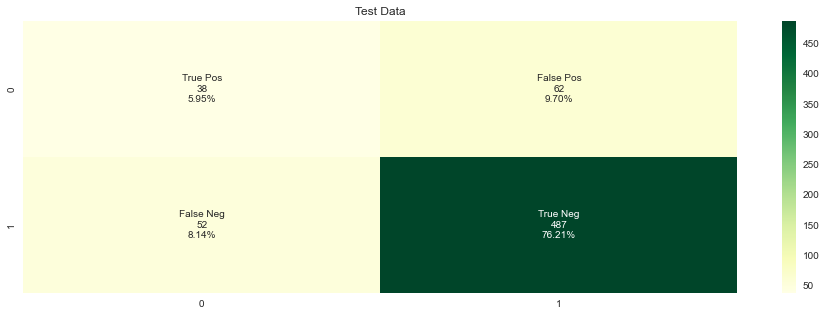

In [53]:
# confusion matrix heatmap for the Random Forest model
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,y_pred_rf)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap="YlGn").set_title('Test Data');

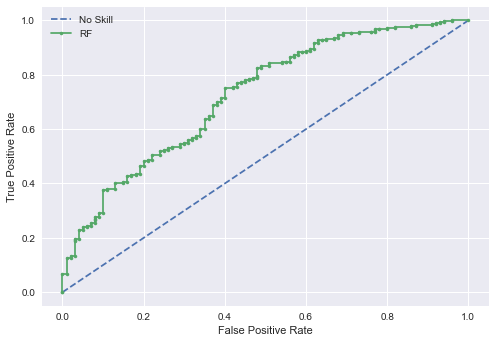

In [54]:
# predict probabilities ROC on hypertuned Random Forest model
calibrator = CalibratedClassifierCV(rf_random, cv='prefit')
model_rf=calibrator.fit(X_res, y_res)
yhat_rf = rf_random.predict_proba(X_test_ss)
# retrieve just the probabilities for the positive class
pos_probs = yhat_rf[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs, pos_label='Positive emotion')
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='RF')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

The ROC curve below compares all of the hypertunes models to each other with a basic logistic regression mode. The Random Forest has the best curve while the hypertuned logistic regression has a curve loser to a 'no skill' line. 

0.8073469387755102 0.8073469387755102 0.7920593692022263 0.7248051948051947


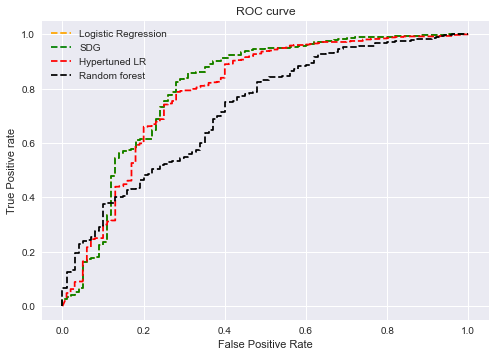

In [55]:
# Testing ROC on this hypertuned Random Forest model in comparison to basic LR, hypertuned SGD & LR model



clf_reg = LogisticRegression()
clf_reg.fit(X_res, y_res)


# predict probabilities
pred_prob1 = model_sgd.predict_proba(X_test_ss.toarray())
pred_prob2 = model_sgd.predict_proba(X_test_ss.toarray())
pred_prob3 = logModel_grid.predict_proba(X_test_ss.toarray())
pred_prob4 = rf_random.predict_proba(X_test_ss.toarray())


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label='Positive emotion')
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label='Positive emotion')
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label='Positive emotion')
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label='Positive emotion')

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SDG')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Hypertuned LR')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='Random forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();



Below, we look at the data while using the unsupervised machine learning algorithm: K Means Clustering. This algorithm groups together and then depicts patterns in the data. 

Principal Component Analysis (PCA)is also shown in the cell below and it is a linear dimensionality reduction technique in which we are able to reduce the dimensionality within the dataset while still keeping as much information as possible. 


Cluster 0
plancast,uber,load,hollywood,area,little,monger,stick,viagra,openexhibits

Cluster 1
monger,hireme,private,little,hollywood,area,stick,openexhibits,viagra,shop

Cluster 2
heavy,approval,uber,load,hollywood,openexhibits,area,monger,little,viagra


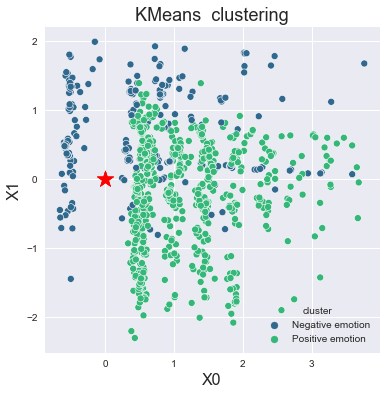

In [56]:
#K-means clustering with  PCA

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

# assign clusters and pca vectors to our dataframe 
corpus['cluster'] = clusters
corpus['x0'] = x0
corpus['x1'] = x1


def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() 
    terms = vec.get_feature_names_out()
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)

# map clusters to appropriate labels 
cluster_map = {0: "Positive emotion", 1: "Negative emotion"}
# apply mapping
corpus['cluster'] = corpus['cluster'].map(cluster_map)

# set image size
fig, ax = plt.subplots(figsize=(6, 6))
# set a title
plt.title("KMeans  clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=corpus, x='x0', y='x1', hue='cluster', palette="viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.show()

The elbow method depicted in the cell below is a graphical representation of finding the optimal 'K' in a K-means clustering. However, this is often a subjective evaluation method and the visualization below does not have an obvious 'elbow', which makes it not an optimal way to choose the best 'K' point.

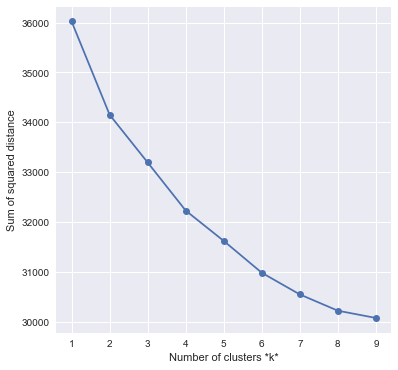

In [57]:
# Run the Kmeans algorithm and get the index of data points clusters

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

## Comparing the hypertuned models

In order to compare the hypertuned models of Stochastic Gradient Descent, Logistic Regression, and Random Forest I placed them in a dictionary below and then plotted the Recall score of each on a plot.

In [59]:
#Comparing the hypertuned models by putting them in a dictionary
models_tuned = {}

# Stochastic Gradient Descent
models_tuned['Stochastic Gradient Descent'] = SGDClassifier(alpha= 0.01, loss = 'log', penalty= 'l2')


# Logistic Regression
models_tuned['Logistic Regression'] = LogisticRegression(C=0.0001, class_weight='balanced', max_iter=20, penalty='none', solver='newton-cg')


#Random Forest
models_tuned['Random Forest'] = RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, min_samples_leaf= 1, max_features= 'auto', max_depth= 50, bootstrap= False)




In [60]:
#looking for accuracy, precision and recall scores within the hypertuned models
accuracy, precision, recall = {}, {}, {}

for keys in models_tuned.keys():
    
    # Fit the classifier
    models_tuned[keys].fit(X_res, y_res)
    
    # Make predictions
    predictions = models_tuned[keys].predict(X_test_ss )
    
    # Calculate metrics
    accuracy[keys] = accuracy_score(predictions, y_test)
    precision[keys] = precision_score(predictions, y_test, pos_label='Positive emotion')
    recall[keys] = recall_score(predictions, y_test, pos_label='Positive emotion')

In [61]:
#create table and image of table comparing the accuracy between the hypertuned models
df_model_tuned = pd.DataFrame(index=models_tuned.keys(), columns=['Recall'])
df_model_tuned['Recall'] = recall.values()

columns=['Recall']


hypertuned_models_recall = (tabulate(df_model_tuned, headers = columns, tablefmt="grid"))
print(hypertuned_models_recall)


+-----------------------------+----------+
|                             |   Recall |
+=============================+==========+
| Stochastic Gradient Descent | 0.907504 |
+-----------------------------+----------+
| Logistic Regression         | 0.911552 |
+-----------------------------+----------+
| Random Forest               | 0.886076 |
+-----------------------------+----------+


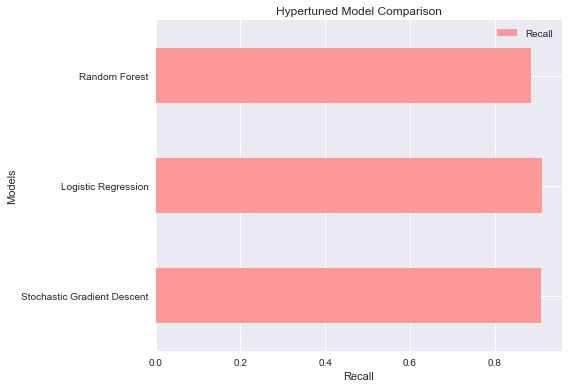

In [62]:
#Plotting the recall scores of the hypertuned models
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = df_model_tuned.plot.barh(color = colors)
ax.set_title('Hypertuned Model Comparison')
ax.set_xlabel('Recall')
ax.set_ylabel('Models')
ax.legend(
    ncol=len(models_tuned.keys()), 
    
)
plt.tight_layout()

## Word cloud

A word cloud is created below in order to display another way to visualize the words from the tweets. 

There are 341588 words in the combination of all review.


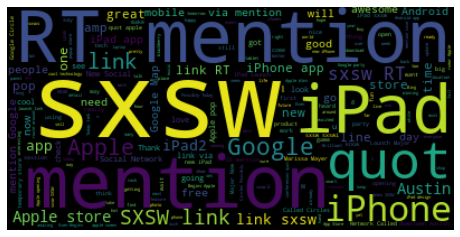

In [63]:
# Generate a word cloud image
text = " ".join(review for review in corpus.tt)
print ("There are {} words in the combination of all review.".format(len(text)))
wordcloud = WordCloud(background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
#To record how long this notebook took to run
b= time.time()
print('This notebook"s runtime is:', b - a)

This notebook"s runtime is: 38473.03610467911


# Final Results

Conclusion: 
- I would recommend that Twitter can use this Random Forest model in sorting through the massive amounts of tweets sent everyday in order to make their workflow easier

- Ensure more targeted marketing 

- This will lead to a better understanding of the emotions of people when they are tweeting about different devices and products


Recommendations: 
- The most frequent words, especially the top 5 of sxsw, mention, ipad, and link can be utilized at Twitter marketing to understand how to promote and market more effectively. 
-They could also consider expanding the number of characters allowed per tweet (as they have expanded it once before) because the amount of words and characters per tweet did not appear to have a difference between the positive and negative tweets. 

Next Steps:

- I would utilize a multi class classification for a ‘neutral’ emotion despite the less data
- I would utilize other vectorizers other than countvectorizer such as tfidfvectorizer. 
- I would also hypertune other models
- Attempt to code correctly sarcastic or ironic tweets that are difficult to understand